### Zomato

# Breakdown of this notebook:
1. **Loading the dataset:** Load the data and import the libraries. <br>
2. **Data Cleaning:** <br>
 - Deleting redundant columns.
 - Renaming the columns.
 - Dropping duplicates.
 - Cleaning individual columns.
 - Remove the NaN values from the dataset
 - #Some Transformations
3. **Regression Analysis**
 - Linear Regression
 - Decision Tree Regression
 - Random Forest Regression
4. **Data Visualization:** Using plots to find relations between the features.
 - Restaurants delivering Online or not
 - Restaurants allowing table booking or not
 - Table booking Rate vs Rate
 - Best Location
 - Relation between Location and Rating
 - Restaurant Type
 - Gaussian Rest type and Rating
 - Types of Services
 - Relation between Type and Rating
 - Cost of Restuarant
 - No. of restaurants in a Location
 - Restaurant type
 - Most famous restaurant chains in Bengaluru 

In [3]:
#Import the libraries
import pandas as pd
import numpy as np

In [4]:
#Data loading
zomato=pd.read_csv(r"C:\Users\Praneeth\Downloads\archive\zomato.csv")
zomato.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
#Get the shape of the data
print('No of Observations: {0}'.format(zomato.shape[0]))
print('No of Variables: {0}'.format(zomato.shape[1]))

No of Observations: 51717
No of Variables: 17


In [6]:
#Get the info about Dtypes,Null values,No of features of the dataset
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [7]:
#Get the percentage of missing values,Percentage of missing value, unique values of the data and datatype
miss_uniqu=pd.DataFrame({"Missing_values":zomato.isnull().sum(),'Percentage_of_null':(zomato.isnull().sum()/zomato.shape[0])*100,'Unique_values':zomato.nunique(),'Dtype':zomato.dtypes})
miss_uniqu

,Missing_values,Percentage_of_null,Unique_values,Dtype
url,0,0.000000,51717,object
address,0,0.000000,11495,object
name,0,0.000000,8792,object
online_order,0,0.000000,2,object
book_table,0,0.000000,2,object
rate,7775,15.033741,64,object
votes,0,0.000000,2328,int64
phone,1208,2.335789,14926,object
location,21,0.040606,93,object
rest_type,227,0.438927,93,object


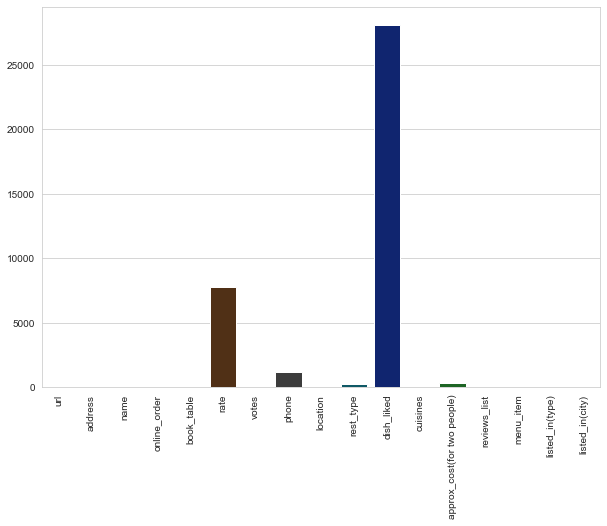

In [8]:
#plot the missing data by the countplot
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.barplot(miss_uniqu.index,miss_uniqu['Missing_values'].values,palette='dark')
plt.xticks(rotation=90)
plt.show()

In [9]:
#Get the num data
for num in zomato.columns:
    if zomato[num].dtype !='O':
        print(num)

votes


In [10]:
#Get the object datatype
cat_data=[]
for obj in zomato.columns:
    if zomato[obj].dtype == 'O':
        cat_data.append(obj)

In [11]:
cat_data

['url',
 'address',
 'name',
 'online_order',
 'book_table',
 'rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)',
 'reviews_list',
 'menu_item',
 'listed_in(type)',
 'listed_in(city)']

In [12]:
labels=zomato['online_order'].value_counts()
sizes=labels.values

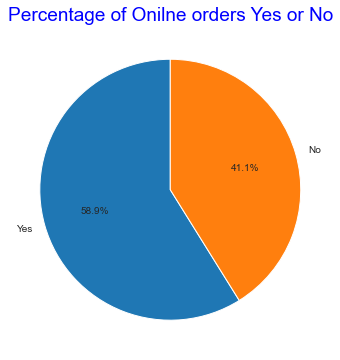

In [13]:
fig,ax=plt.subplots(figsize=(10,6))
ax.pie(sizes,labels=labels.index,autopct='%1.1f%%',startangle=90)
plt.title('Percentage of Onilne orders Yes or No',fontsize=19,c='b')
plt.show()

In [14]:
label=zomato['book_table'].value_counts()

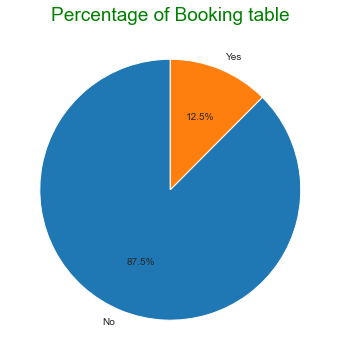

In [15]:
fig,ax=plt.subplots(figsize=(10,6))
plt.pie(label.values,labels=label.index,autopct='%1.1f%%',startangle=90)
plt.title('Percentage of Booking table',fontsize=19,c='g')
plt.show()

In [16]:
#Rename the columns
zomato.rename(columns={"listed_in(type)":'Type','listed_in(city)':'City'},inplace=True)

In [17]:
zomato.rename(columns={'approx_cost(for two people)':'Cost'},inplace=True)

In [18]:
top_20_rest=zomato['rest_type'].value_counts().nlargest(20)

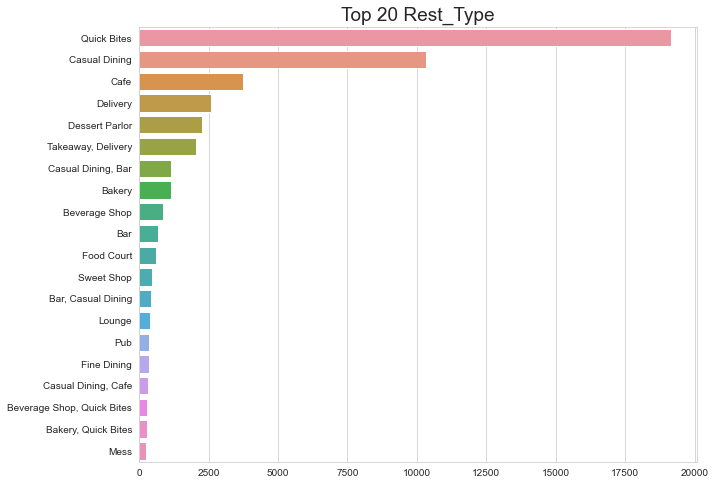

In [19]:
#Visualize the top 20 restuarent types
plt.figure(figsize=(10,8))
sns.barplot(x=top_20_rest.values,y=top_20_rest.index)
plt.title('Top 20 Rest_Type',fontsize=19)
plt.show()

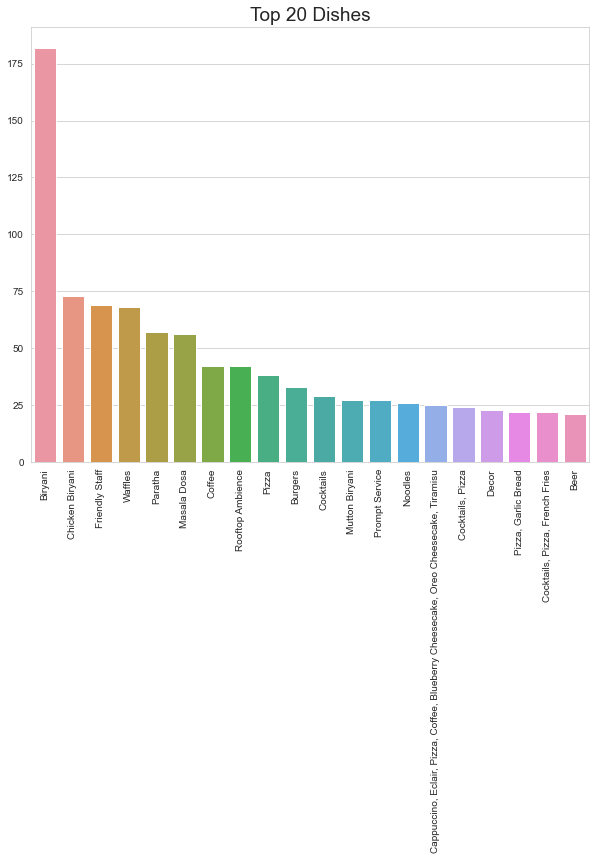

In [20]:
#plot the top 20 dishes that are people liked the most
top_20_dish=zomato['dish_liked'].value_counts().nlargest(20)
plt.figure(figsize=(10,8))
sns.barplot(x=top_20_dish.index,y=top_20_dish.values)
plt.title('Top 20 Dishes',fontsize=19)
plt.xticks(rotation=90)
plt.show()

In [21]:
#Get the dish which getting high high votes
zomato[zomato['votes']==zomato['votes'].max()]['dish_liked']

49170    Cocktails, Butter Chicken, Dahi Kebab, Rajma C...
49627    Cocktails, Butter Chicken, Dahi Kebab, Rajma C...
50059    Cocktails, Butter Chicken, Dahi Kebab, Rajma C...
Name: dish_liked, dtype: object

In [22]:
zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [23]:
#Remove the slash object from the rating column
zomato=zomato.loc[zomato['rate'] !='NEW']
zomato=zomato.loc[zomato['rate'] !='-'].reset_index(drop=True)
zomato['rate']=zomato['rate'].apply(lambda x: x.replace('/5','') if type(x)==str else x)

In [24]:
zomato['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: object

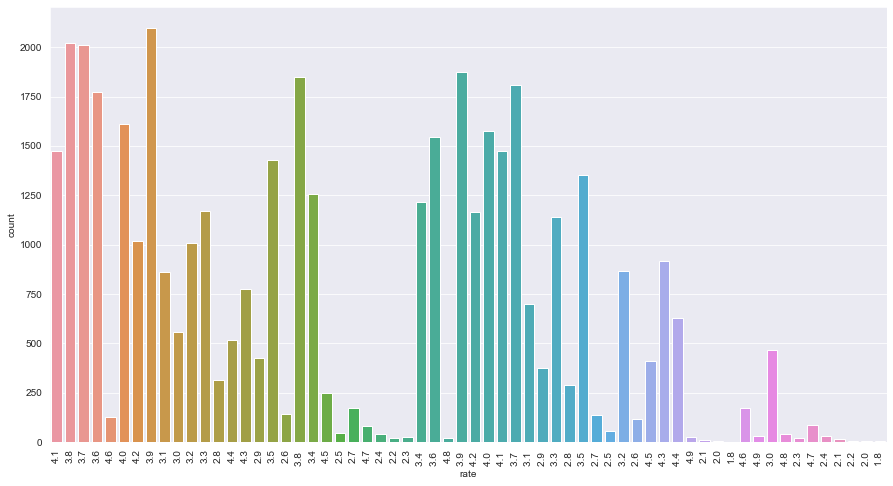

In [25]:
#Check the rating with help of countplot
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
sns.countplot(x='rate',data=zomato)
plt.xticks(rotation=90)
plt.show()

In [26]:
#Convert the string to float
zomato['rate']=zomato['rate'].astype(float)

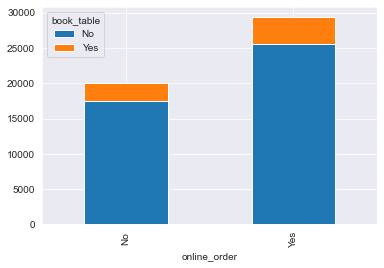

In [27]:
#Check the relation ship between the two categorical variables
on=pd.crosstab(zomato['online_order'],zomato['book_table'])
on.plot(kind='bar',stacked=True)

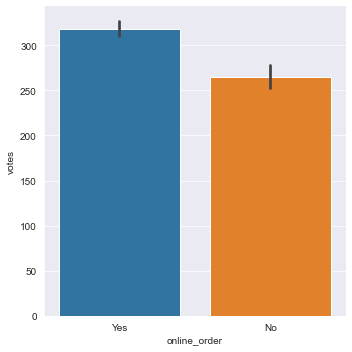

In [28]:
sns.catplot(x='online_order',y='votes',data=zomato,kind='bar')

In [29]:
zomato['rate'].dtype

dtype('float64')

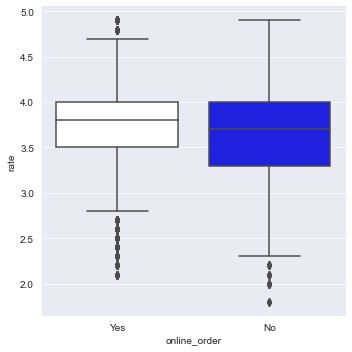

In [30]:
sns.catplot(x='online_order',y='rate',data=zomato,kind='box',palette='flag')

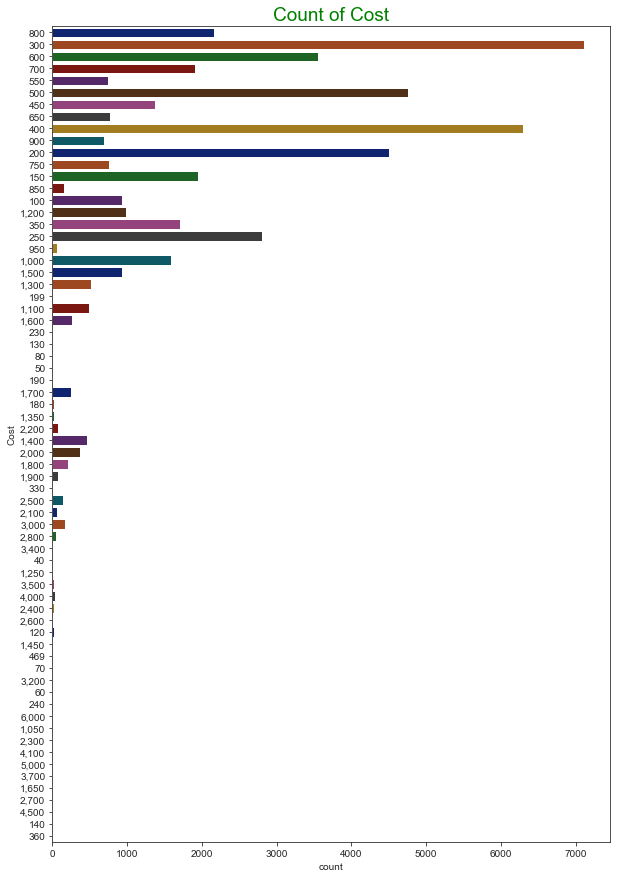

In [31]:
plt.figure(figsize=(10,15))
sns.set_style('ticks')
sns.countplot(y='Cost',data=zomato,palette='dark')
plt.title('Count of Cost',fontsize=19,c='g')
plt.show()

In [32]:
zomato['Cost']=zomato['Cost'].apply(lambda x: x.replace(',','') if type(x)==str else x)

In [33]:
#Drop the nan values that are not nessacary during the model building
z1=zomato.copy()  #copy the data in to z1 variabel
z1.dropna(inplace=True)  #Droping nan

In [34]:
#Remove unwanted columns that not having a meaning data
z1=z1.drop(columns=['url','address','phone','menu_item','reviews_list'],axis=1)

In [35]:
z1.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,Cost,Type,City
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [36]:
top_20_dish.index

Index(['Biryani', 'Chicken Biryani', 'Friendly Staff', 'Waffles', 'Paratha',
       'Masala Dosa', 'Coffee', 'Rooftop Ambience', 'Pizza', 'Burgers',
       'Cocktails', 'Mutton Biryani', 'Prompt Service', 'Noodles',
       'Cappuccino, Eclair, Pizza, Coffee, Blueberry Cheesecake, Oreo Cheesecake, Tiramisu',
       'Cocktails, Pizza', 'Decor', 'Pizza, Garlic Bread',
       'Cocktails, Pizza, French Fries', 'Beer'],
      dtype='object')

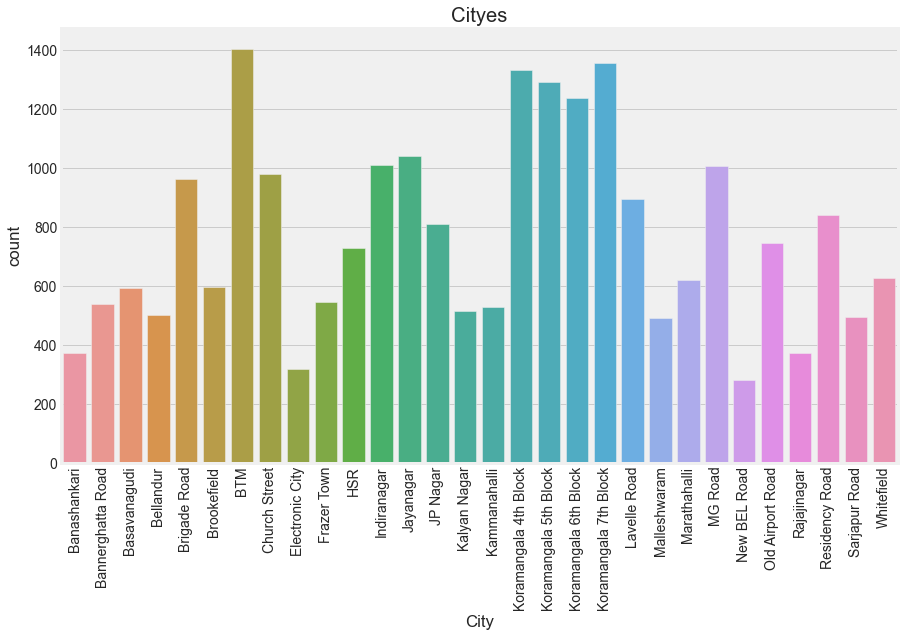

In [37]:
plt.figure(figsize=(15,8))
plt.style.use('fivethirtyeight')
ax=sns.countplot(z1['City'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Cityes')
plt.show()

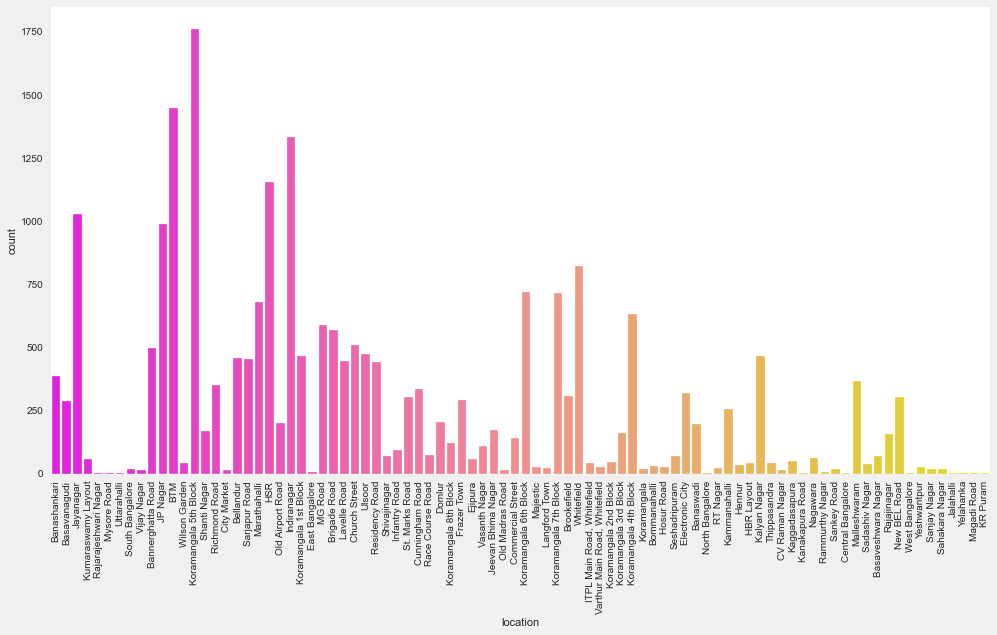

In [38]:
plt.figure(figsize=(15,8))
plt.style.use('seaborn')
sns.set_style('ticks')
sns.countplot(z1['location'],palette='spring')
plt.xticks(rotation=90)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

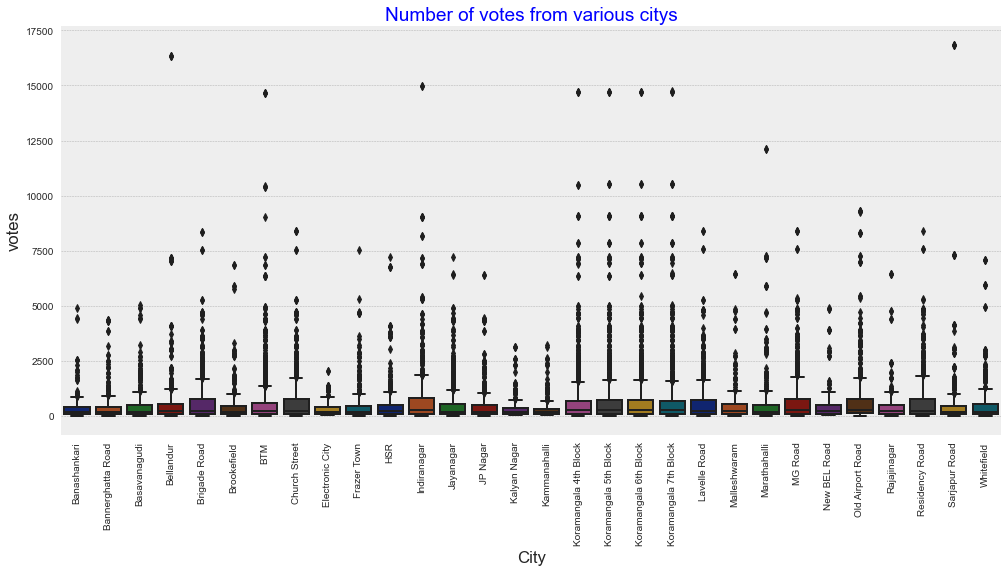

In [39]:
#Check the number of votes getting from the various cityes
plt.figure(figsize=(15,7))
plt.style.use('bmh')
sns.boxplot(x='City',y='votes',data=z1,palette='dark')
plt.title('Number of votes from various citys',fontsize=19,c='b')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

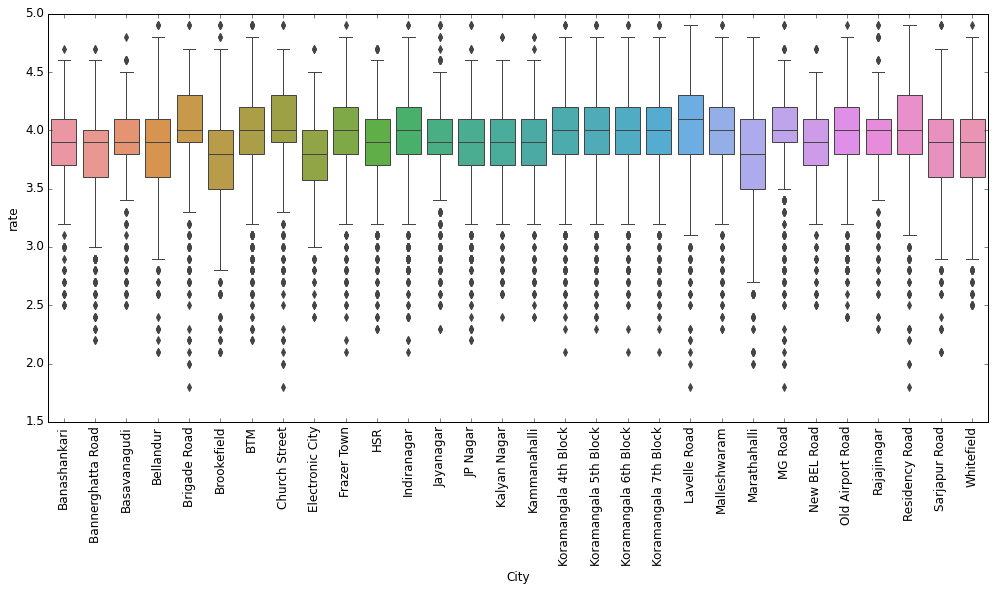

In [40]:
#Count of rating from the diferent citys
plt.figure(figsize=(15,7))
plt.style.use('classic')
sns.boxplot(x='City',y='rate',data=z1)
plt.xticks(rotation=90)

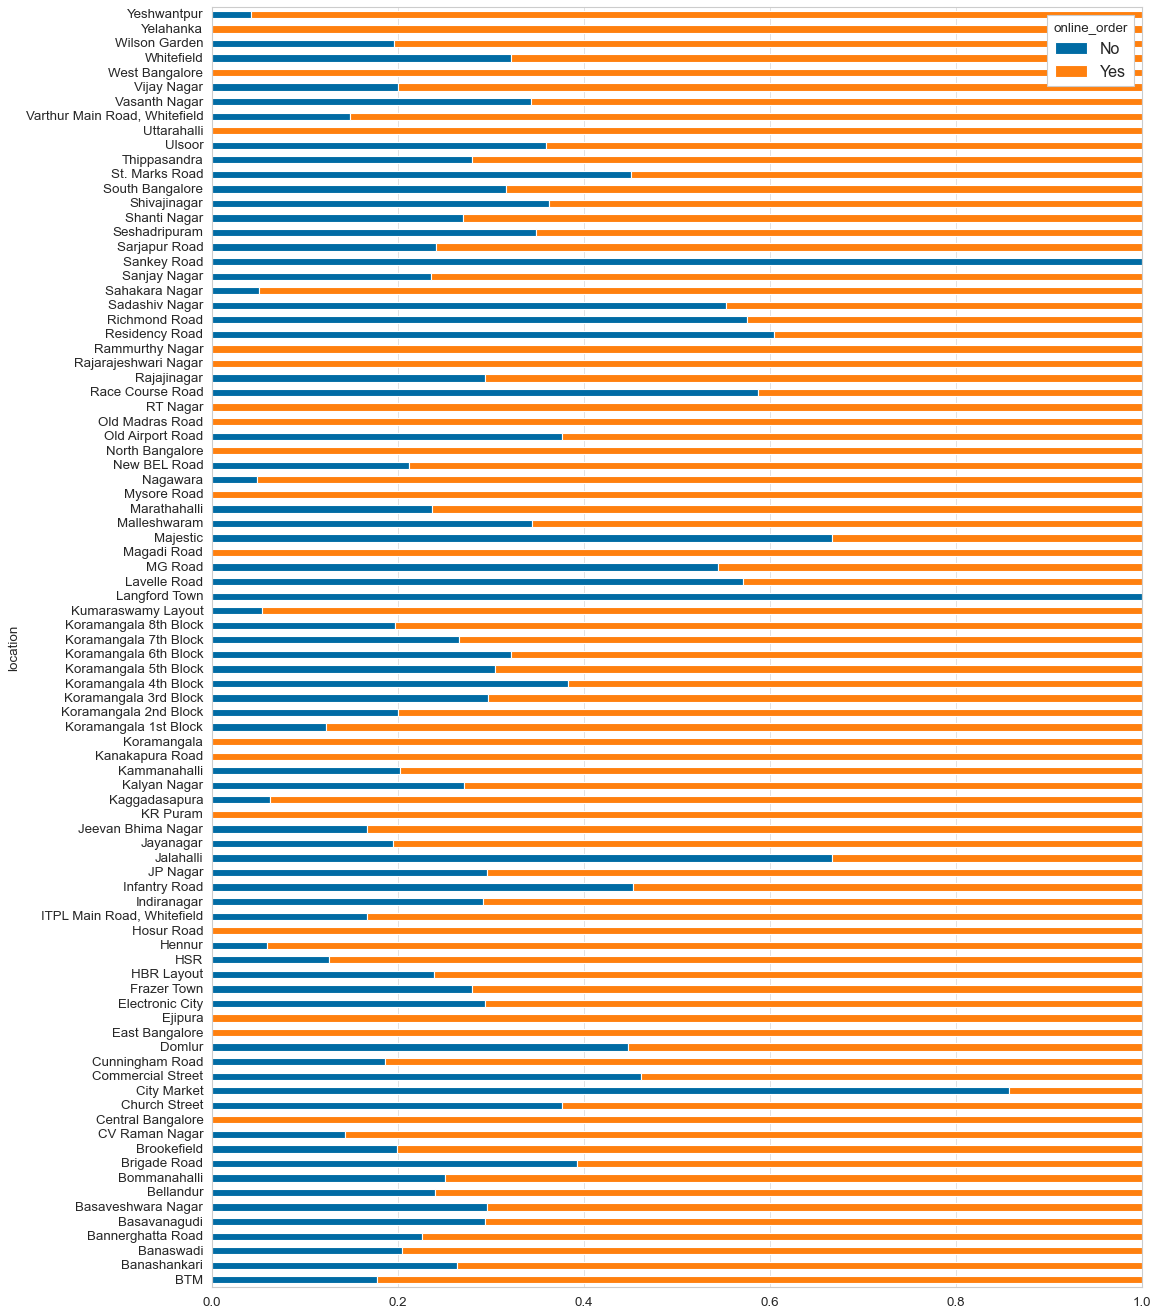

In [41]:
#visulaize the amount of online oders are coming from various loactions
loc_1=pd.crosstab(z1['location'],z1['online_order'])
plt.style.use('tableau-colorblind10')
sns.set_style('whitegrid')
loc_1.div(loc_1.sum(1).astype(float),axis=0).plot(kind='barh',stacked=True,figsize=(15,20))

In [42]:
#Get the dish_liked with high cost 
z1['Cost']=z1['Cost'].astype(int)
z1[z1['Cost']==z1['Cost'].max()]['dish_liked']

18068    Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...
43506    Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...
Name: dish_liked, dtype: object

In [43]:
#Get the least cost of the dish
z1[z1['Cost']==z1['Cost'].min()]

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,Cost,Type,City
4965,Srinidhi Sagar Food Line,Yes,No,3.7,129,Indiranagar,Quick Bites,"Vada, Masala Dosa, Filter Coffee","South Indian, North Indian, Chinese",40,Delivery,Brigade Road
11572,Srinidhi Sagar Food Line,Yes,No,3.7,129,Indiranagar,Quick Bites,"Vada, Masala Dosa, Filter Coffee","South Indian, North Indian, Chinese",40,Delivery,Church Street
14000,Srinidhi Sagar Food Line,Yes,No,3.7,131,Indiranagar,Quick Bites,"Vada, Masala Dosa, Filter Coffee","South Indian, North Indian, Chinese",40,Delivery,Frazer Town
16794,Srinidhi Sagar,Yes,No,3.9,160,Old Airport Road,Quick Bites,"Masala Dosa, Rava Dosa, Rava Idli, Filter Coff...","South Indian, North Indian, Chinese",40,Delivery,Indiranagar
17832,Srinidhi Sagar Food Line,Yes,No,3.7,129,Indiranagar,Quick Bites,"Vada, Masala Dosa, Filter Coffee","South Indian, North Indian, Chinese",40,Dine-out,Indiranagar
25652,Srinidhi Sagar Deluxe,Yes,No,3.6,108,Domlur,Quick Bites,"Idli, Coffee, Masala Dosa, Fruit Juices, Vada,...","South Indian, North Indian, Chinese",40,Delivery,Koramangala 4th Block
28253,Srinidhi Sagar Deluxe,Yes,No,3.6,108,Domlur,Quick Bites,"Idli, Coffee, Masala Dosa, Fruit Juices, Vada,...","South Indian, North Indian, Chinese",40,Delivery,Koramangala 5th Block
30828,Srinidhi Sagar,Yes,No,3.9,162,Old Airport Road,Quick Bites,"Masala Dosa, Rava Dosa, Rava Idli, Filter Coff...","South Indian, North Indian, Chinese",40,Delivery,Koramangala 6th Block


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

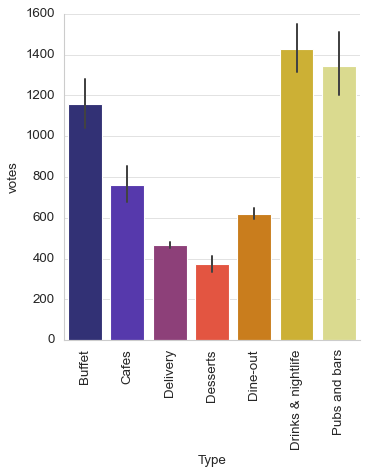

In [44]:
#Check the Number of votes getting from the type of the resturent
sns.catplot(x='Type',y='votes',data=z1,kind='bar',palette='CMRmap')
plt.xticks(rotation=90)

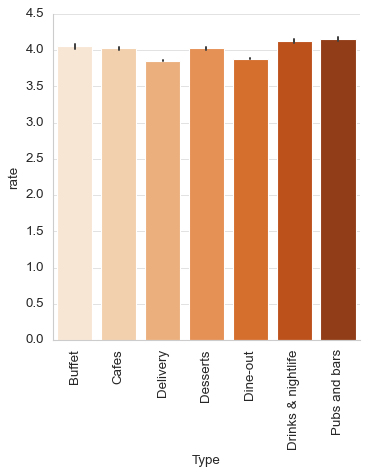

In [45]:
sns.catplot(x='Type',y='rate',data=z1,kind='bar',palette='Oranges')
plt.xticks(rotation=90)
plt.show()

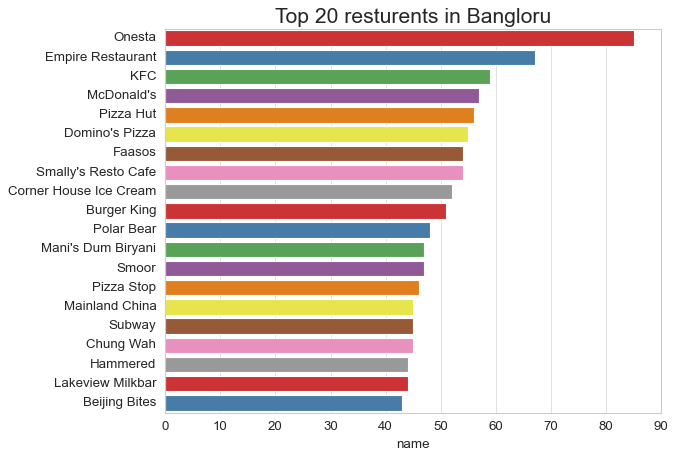

In [46]:
#Most famous resturents in Bangloru
rest=z1['name'].value_counts().nlargest(20)
sns.barplot(x=rest,y=rest.index,palette='Set1')
plt.title('Top 20 resturents in Bangloru',fontsize=19)
plt.show()

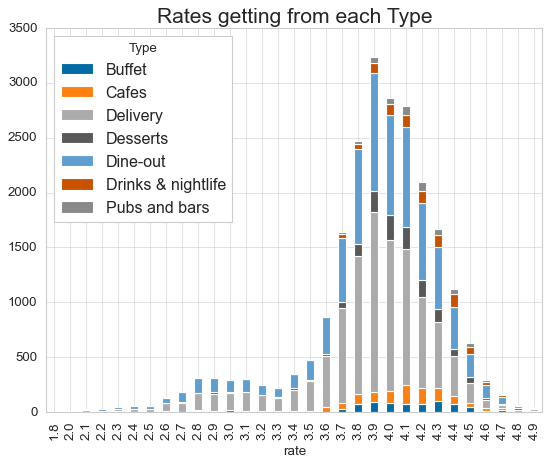

In [47]:
rate_type=pd.crosstab(z1['rate'],z1['Type'])
rate_type.plot(kind='bar',stacked=True)
plt.title('Rates getting from each Type',fontsize=19)
plt.show()

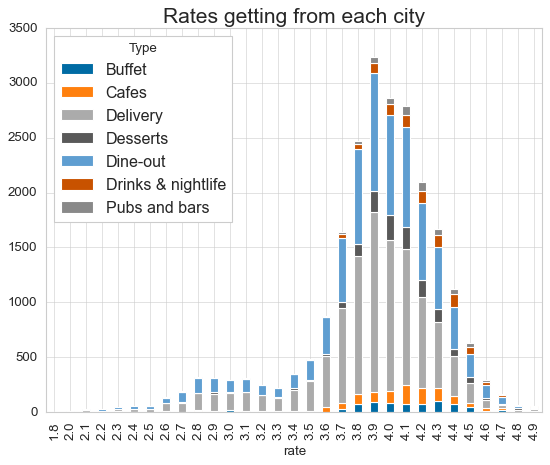

In [48]:
rate_type=pd.crosstab(z1['rate'],z1['Type'])
rate_type.plot(kind='bar',stacked=True)
plt.title('Rates getting from each city',fontsize=19)
plt.show()

In [49]:
#Split the data in to x and y
x=z1.drop('rate',axis=1)
y=z1['rate']

In [50]:
x=x.drop(columns=['dish_liked','City','name'],axis=1)

In [51]:
x.head()

,online_order,book_table,votes,location,rest_type,cuisines,Cost,Type
0,Yes,Yes,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Yes,No,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,Yes,No,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,No,No,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,No,No,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [52]:
#Encode the categorcal values in to numerical values 
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
x['online_order']=lc.fit_transform(x['online_order'])
x['book_table']=lc.fit_transform(x['book_table'])
x['cuisines']=lc.fit_transform(x['cuisines'])

In [53]:
x['Type']=lc.fit_transform(x['Type'])

In [54]:
x['location']=lc.fit_transform(x['location'])
x['rest_type']=lc.fit_transform(x['rest_type'])

In [55]:
x.head()

,online_order,book_table,votes,location,rest_type,cuisines,Cost,Type
0,1,1,775,1,20,1382,800,0
1,1,0,787,1,20,592,800,0
2,1,0,918,1,16,482,800,0
3,0,0,88,1,62,1583,300,0
4,0,0,166,4,20,1402,600,0


In [56]:
#Split the data in to training and test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [57]:
#Scale down the all values in to same vectors
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [58]:
#Model building
#Linear Regression
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

reg_pred=reg.predict(x_test)
reg_pred[:2]

array([3.72785862, 3.78506194])

In [59]:
reg.coef_

array([ 0.01523319,  0.08531362,  0.1210427 ,  0.02574094, -0.01293373,
       -0.03391694,  0.04049174, -0.00430069])

In [60]:
reg.intercept_

3.9047515730093294

In [61]:
#get the performance on the test data and train data
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('Mean absolute error: ',mean_absolute_error(y_test,reg_pred))
print('Mean squared error: ',mean_squared_error(y_test,reg_pred))
print('Root mean squared error: ',np.sqrt(mean_squared_error(y_test,reg_pred)))
print('r2 Score: ',r2_score(y_test,reg_pred))

Mean absolute error:  0.2636176807047648
Mean squared error:  0.13935713476065814
Root mean squared error:  0.3733056854116451
r2 Score:  0.23245449772149995


In [62]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

rf_pred=rf.predict(x_test)

In [63]:
print('Mean absolute error: ',mean_absolute_error(y_test,rf_pred))
print('Mean squared error: ',mean_squared_error(y_test,rf_pred))
print('Root mean squared error: ',np.sqrt(mean_squared_error(y_test,rf_pred)))
print('r2 Score: ',r2_score(y_test,rf_pred))

Mean absolute error:  0.05112620354820032
Mean squared error:  0.015433988273402104
Root mean squared error:  0.12423360364008645
r2 Score:  0.914993313389985


In [64]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

dt_pred=dt.predict(x_test)

In [65]:
print('Mean absolute error: ',mean_absolute_error(y_test,dt_pred))
print('Mean squared error: ',mean_squared_error(y_test,dt_pred))
print('Root mean squared error: ',np.sqrt(mean_squared_error(y_test,dt_pred)))
print('r2 Score: ',r2_score(y_test,dt_pred))

Mean absolute error:  0.036205712219812176
Mean squared error:  0.024774355868884067
Root mean squared error:  0.15739871622374838
r2 Score:  0.8635488204341499


In [66]:
#ExtraTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
extra=ExtraTreesRegressor(n_estimators=100)
extra.fit(x_train,y_train)

extra_pred=extra.predict(x_test)

In [67]:
print('Mean absolute error: ',mean_absolute_error(y_test,extra_pred))
print('Mean squared error: ',mean_squared_error(y_test,extra_pred))
print('Root mean squared error: ',np.sqrt(mean_squared_error(y_test,extra_pred)))
print('r2 Score: ',r2_score(y_test,extra_pred))

Mean absolute error:  0.03566198843095008
Mean squared error:  0.01212366240286817
Root mean squared error:  0.11010750384450721
r2 Score:  0.9332257902371035


In [68]:
#xgboost
from xgboost import XGBRegressor
xgb_r=XGBRegressor()
xgb_r.fit(x_train,y_train)

xgb_r_pred=xgb_r.predict(x_test)

In [69]:
print('Mean absolute error: ',mean_absolute_error(y_test,xgb_r_pred))
print('Mean squared error: ',mean_squared_error(y_test,xgb_r_pred))
print('Root mean squared error: ',np.sqrt(mean_squared_error(y_test,xgb_r_pred)))
print('r2 Score: ',r2_score(y_test,xgb_r_pred))

Mean absolute error:  0.13240998062291012
Mean squared error:  0.0395258388031866
Root mean squared error:  0.19881106308046995
r2 Score:  0.7823012086946584


In [75]:
#Predictions
def predict(online_order,book_table,votes,location,rest_type,cuisines,Cost,Type):
    order=int(online_order)
    book=int(book_table)
    vote=float(votes)
    loc=int(location)
    rest=float(rest_type)
    cuis=float(cuisines)
    cost=float(Cost)
    typ=int(Type)
    
    x_p=[[order,book,vote,loc,rest,cuis,cost,typ]]
    x_p=sc.transform(x_p)
    
    return extra.predict(x_p)

In [79]:
predictions=predict(1,1,775,1,20,1382,800,0)
print('The Predicted rating is : {0}'.format(predictions))

The Predicted rating is : [4.1]


From the above Models The ExtraTreeRegressor gives a better accuracy as compared to the other ML algorithems

In [73]:
#Dump the file 
import pickle
filename='Extra_model.pickle'
pickle.dump(extra,open(filename,'wb'))